Name: Mukesh Aryal

Student No: V00977403

Assignment 02

Phys555


# Question No.: 01
# Logistic regression for a multiclass classification using MNIST dataset
-> The motivation behind this question is to observe the importance of Principle Component Analysis (PCA) and its effect on the accuracy of the prediction. 

-> The first part of the problem deals with training the model with no PCA. While including high dimension of data, we expect to see the computational challege of handling the data.

-> The second part of the problem introduces PCA with 100 components. With fewer dimension of data, computational cost should be lower.

-> The third part further decreses the componenets of PCA to 20. Here, we expect to see the effect of reducing the dimension too much. If significant features of the data is lost, the model cannot be trained properly and fails to do the correct prediction.

# About PCA

PCA is an unsupervised and non-parametric technique used in machine learning for reducing the dimension of a large data. 
A large number of features usually makes the dimension of the data very large and computationally expensive. High dimension of the data can be reduced and compressed to a lower dimension of data that can be easily processed, preserving the important characteristics of the data. It is also very good and efficient in filtering the noisy datasets.

In [35]:
#loading packages
%reset -f
%matplotlib inline
import pandas as pd
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.decomposition import PCA

print('Done!')


Done!


# About MNIST dataset
The MNIST database is a large database of handwritten digits that can be used to train and predict different models; furthermore, it helps us to check the accuracy of model. The dimension of each image of the database is 28x28. The database contains 60,000 training images and 10,000 testing images.

In [36]:
## Getting MNIST data 


##Defining Input and target and normalizing the input



from tensorflow.keras.datasets import mnist

(inp_tr_cl, tar_tr), (inp_va_cl, tar_va) = mnist.load_data()
inp_tr_cl= inp_tr_cl/255.
inp_va_cl= inp_va_cl/255.
inp_tr_cl = np.reshape(inp_tr_cl,(-1,784))
inp_va_cl = np.reshape(inp_va_cl,(-1,784))



print (np.shape(inp_tr_cl),np.shape(inp_va_cl))

(60000, 784) (10000, 784)


In [37]:
print (tar_tr[0:100]) ## Shuffled?  Yes!
print ('--------------------------------')
print (tar_va[0:100]) ## Shuffled?  Yes!

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
--------------------------------
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


<Figure size 432x288 with 0 Axes>

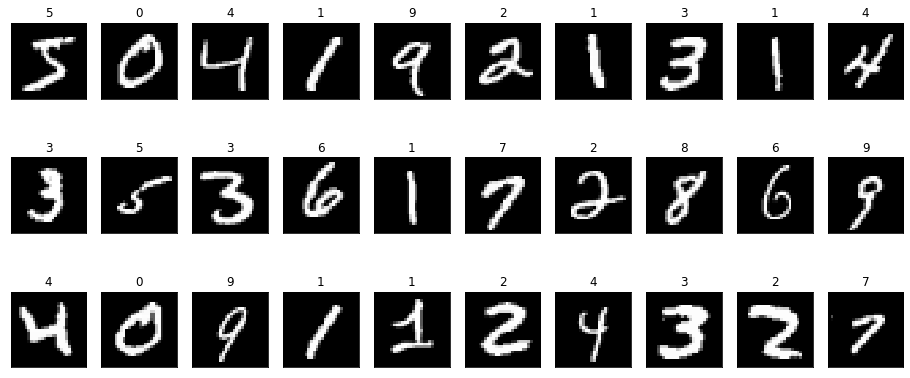

In [38]:
# Plotting and making sure that the target and image data correspond to each other

n1=0
n2=30
plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(n1,n2):
    ax = fig.add_subplot(3,10,k1+1, title=str(int(tar_tr[k1])))
    ax.matshow(inp_tr_cl[k1].reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# Introducing Noise
Introducing noise and observing the disturbance in the images. Noises are introduced to check how PCA handles and filter the noise in the input. 

(60000, 784) (10000, 784)


<Figure size 432x288 with 0 Axes>

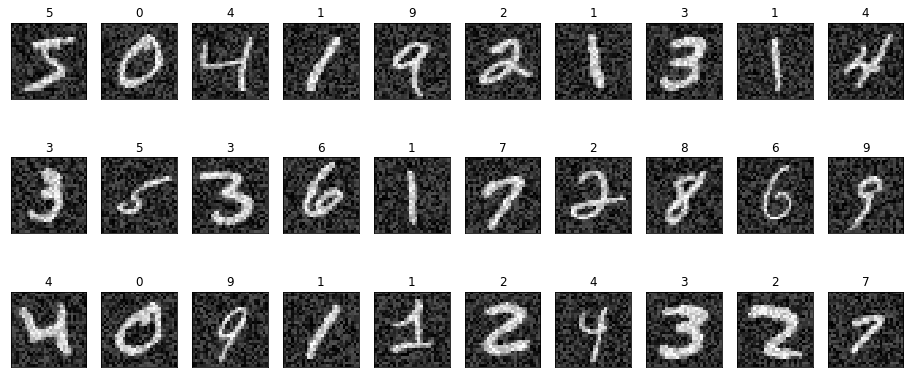

In [39]:
# sample images with noise 

c_noise = 0.5
noise_tr = np.random.rand(60000,784)*c_noise
noise_va = np.random.rand(10000,784)*c_noise

inp_tr = (inp_tr_cl+noise_tr)/(1+c_noise)
inp_va = (inp_va_cl+noise_va)/(1+c_noise)

print(np.shape(inp_tr),np.shape(inp_va))

# presenting some digits

n1=0
n2=30
plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(n1,n2):
    ax = fig.add_subplot(3,10,k1+1, title=str(int(tar_tr[k1])))
    ax.matshow(inp_tr[k1].reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


# Logistic regression
LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

The model is a linear model from sklearn. It has several hyperparameters. Since we are not interested in tuning the hyperparameters at this point, the default parameters are used by increasing the maximum iteration to 10000. The default max_iter was just 100 and was not very useful here. 

In [40]:
#logistic regression without PCA
import time

start = time.time()

n_noise = [0,0.25,0.5,1,1.5,2,3,4.5,10,20,30,40,50]
accuracy_no_pca = []

for c_noise in n_noise:    
    # adding noise 
    #added line
    noise_tr = np.random.rand(60000,784)*c_noise
    noise_va = np.random.rand(10000,784)*c_noise

    inp_tr = (inp_tr_cl+noise_tr)/(1+c_noise)
    inp_va = (inp_va_cl+noise_va)/(1+c_noise)

    # logistic regression with default parameters
    logistic= linear_model.LogisticRegression(max_iter=10000)

    # train the model
    logistic.fit(inp_tr,tar_tr)

    pred_va = logistic.predict(inp_va)
    accuracy_no_pca.append(metrics.accuracy_score(pred_va,tar_va))    
    
end = time.time()

print('Time elapsed: '+str(end-start)+'s')


Time elapsed: 1574.7917923927307s


# Observation
The time it takes to train and predict the outcome without using PCA is very large. Thus the weight of the high dimensionality is clearly evident.  

# Introducing PCA and observing its effect on the performance of the model.
For the first step 100 components are taken. Reducing the features to 100 components do not reduce the computational time very much and the efficiency is slightly improved.

In [41]:
# using PCA with 100 components
start = time.time()

accuracy_pca_100 = []
pca_val = 100

for c_noise in n_noise:    
    # adding noise 
    noise_tr = np.random.rand(60000,784)*c_noise
    noise_va = np.random.rand(10000,784)*c_noise

    inp_tr = (inp_tr_cl+noise_tr)/(1+c_noise)
    inp_va = (inp_va_cl+noise_va)/(1+c_noise)
    
    # PCA      
    pca = PCA(n_components = pca_val)
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    # logistic regression with default parameters
    logistic= linear_model.LogisticRegression(max_iter=10000)

    # train the model
    logistic.fit(inp_tr_pca,tar_tr)
    pred_va = logistic.predict(inp_va_pca)
    accu = metrics.accuracy_score(pred_va,tar_va)
    accuracy_pca_100.append(accu)
    
end = time.time()

print('Time elapsed: '+str(end-start)+'s')


Time elapsed: 98.38640356063843s


# 20 components PCA
With 20 feature size, PCA can be seen to significantly improve the efficiency of the model. The model is a lot faster and accurate enough. 

In [42]:
# with pca = 20
start = time.time()

accuracy_pca_20 = []
pca_val = 20

for c_noise in n_noise:    
    # adding noise 
    #added line
    noise_tr = np.random.rand(60000,784)*c_noise
    noise_va = np.random.rand(10000,784)*c_noise

    inp_tr = (inp_tr_cl+noise_tr)/(1+c_noise)
    inp_va = (inp_va_cl+noise_va)/(1+c_noise)
    
    # PCA       
    pca = PCA(n_components = pca_val)
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    # logistic regression with default parameters
    logistic= linear_model.LogisticRegression(max_iter = 10000)

    # train the model
    logistic.fit(inp_tr_pca,tar_tr)
    pred_va = logistic.predict(inp_va_pca)
    accu = metrics.accuracy_score(pred_va,tar_va)
    accuracy_pca_20.append(accu)

end = time.time()

print('Time elapsed: '+str(end-start)+'s')

Time elapsed: 66.12797689437866s


# Plots to compare the accuracy of the model with different component values of PCA
Three different results from using three different dimension of data is illustrated in the graph below.

Text(0, 0.5, 'Accuracy')

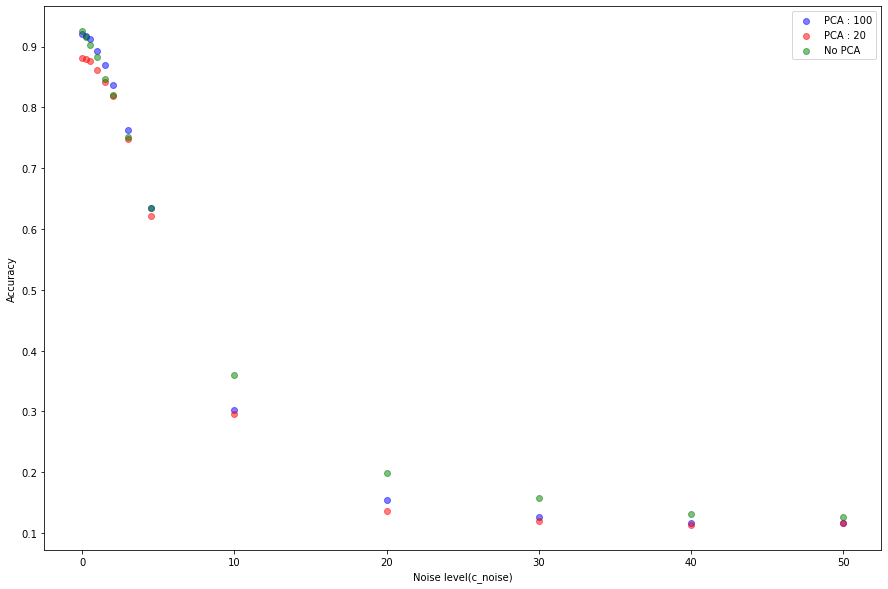

In [43]:
# plots for comparison
fig = plt.figure(figsize=(15,10))
plt.scatter(n_noise,accuracy_pca_100,c='b',alpha = 0.5, label='PCA : 100')
plt.scatter(n_noise,accuracy_pca_20,c='r',alpha = 0.5, label='PCA : 20')
plt.scatter(n_noise,accuracy_no_pca,c='g',alpha = 0.5, label='No PCA')
plt.legend()

plt.xlabel('Noise level(c_noise)')
plt.ylabel('Accuracy')
# fig.scatter(n_noise,accuracy_pca_20)

# Observation
The accuracy of the model is high when all data points are included when no noise is present as expected. Note that, the accuracy made by the 100 component PCA is better than model with all components and no PCA. Here, we can observe that PCA did particularly better filtering the noise from the database. Another important distinction is the trend in accuracy. Even when the 20 components of the PCA was used, the model is still performing comparing to othe models with higher dimension. The power of PCA can easily be seen from the graph. 

Text(0, 0.5, 'Accuracy')

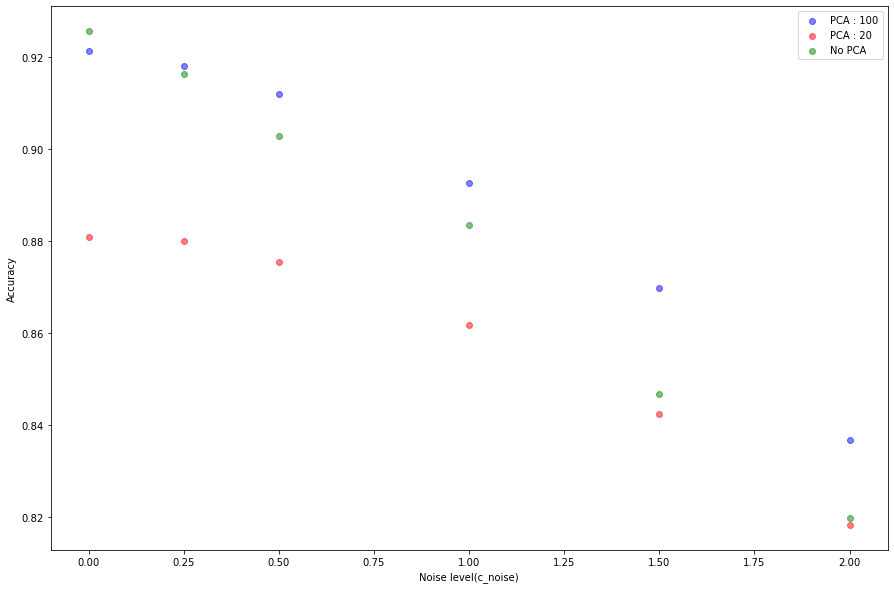

In [44]:
# zooming in on the initial level of noises. 

index = len(n_noise)//2

fig = plt.figure(figsize=(15,10))
plt.scatter(n_noise[0:index],accuracy_pca_100[0:index],c='b',alpha = 0.5, label='PCA : 100')
plt.scatter(n_noise[0:index],accuracy_pca_20[0:index],c='r',alpha = 0.5, label='PCA : 20')
plt.scatter(n_noise[0:index],accuracy_no_pca[0:index],c='g',alpha = 0.5, label='No PCA')
plt.legend()

plt.xlabel('Noise level(c_noise)')
plt.ylabel('Accuracy')

# fig.scatter(n_noise,accuracy_pca_20)

# Conclusion
PCA is a very important tool to tackle higher dimension data. Care should be taken while choosing the value of number of components if higher accuracy is preferred. A higher dimension data can be computationally heavy to model and process. PCA can be used to improve the efficiency of the model along with its performance. When used properly PCA can improve the accuracy of the model and its efficiency greatly. The ability of PCA to handle noise is also clearly evident from this practice. 